# Lead Scoring Case Study

## Problem Statement

  An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

   - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   


## Approach taken

 - Importing libraries and dataset
 - Data cleaning and data manipulation
    - Check for imbalanced data
    - Check for columns with Select value and Impute the data
    - Check for duplicate data
    - Check for  missing values and impute/drop the columns
    - Check for outliers and impute data
 - Exploratory data analysis
   - Univariate analysis
   - Bivariate analysis
 - Data Preparation
   - Dataset split into Train and Test sets
   - Feature scaling and Dummy variables and encoding the data
 - Model Building using RFE and make use of StatsModel
   - Build logistic regression model and delete the variables which are not useful using the p-value and VIF values
 - Model Evaluation
   - Confusion Matrix and ROC curve
   - Optimal cutoff point for Accuracy Sensitivity and Specificity	
 - Model Prediction on test dataset
 - Precision and Recall View
   - Precision and Recall tradeoff
 - Model Prediction on test dataset

### Importing Libraries and Data

In [1]:
#importing libraries
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataframe

In [3]:
# Dimentions of leads_data dataframe
leads_data.shape

(9240, 37)

 Insights: There are 37 columns and 9240 data points in the dataset

In [4]:
# Statistical description of df
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Insights: There are only 7 numeric columns and remaining are categorical columns. There seems to be some outliers in TotalVisits,Total Time Spent on Website and Page Views Per Visit. Needs more analysis on this.

In [5]:
# Info about dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Percentage of Null values in the dataset
leads_data.isna().sum()/len(leads_data)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Insgihts:

There are missing values in the dataset and the data cleaning has to be done by performing imputation or deleting the data points

In [7]:
leads_data.duplicated().sum()

0

Insights: There is no duplicated data.

### Data Cleaning

#### The columns with missing values more than 40% of data will be deleted and assigned with new data frame

leads_df is the new dataframe for the new dataset

In [8]:
# Dropping cols where there are >40% missing values
missing_percentage = leads_data.isna().sum() / len(leads_data) * 100
drop_cols = missing_percentage[missing_percentage > 40].index.tolist()
leads_df = leads_data.drop(columns=drop_cols)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


Insights:
    
5 columns where the data missing values more than 40% are deleted.

32 columns are still present

In [9]:
# Number of unique values for each column for initial prediction
for i in leads_df.columns:
    print (i,"---",leads_df[i].nunique())

Prospect ID --- 9240
Lead Number --- 9240
Lead Origin --- 5
Lead Source --- 21
Do Not Email --- 2
Do Not Call --- 2
Converted --- 2
TotalVisits --- 41
Total Time Spent on Website --- 1731
Page Views Per Visit --- 114
Last Activity --- 17
Country --- 38
Specialization --- 19
How did you hear about X Education --- 10
What is your current occupation --- 6
What matters most to you in choosing a course --- 3
Search --- 2
Magazine --- 1
Newspaper Article --- 2
X Education Forums --- 2
Newspaper --- 2
Digital Advertisement --- 2
Through Recommendations --- 2
Receive More Updates About Our Courses --- 1
Tags --- 26
Update me on Supply Chain Content --- 1
Get updates on DM Content --- 1
Lead Profile --- 6
City --- 7
I agree to pay the amount through cheque --- 1
A free copy of Mastering The Interview --- 2
Last Notable Activity --- 16


In [10]:
# The columns that are having unique values
leads_df = leads_df.drop(["Prospect ID","Lead Number"],axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Insights:
    
"Prospect ID","Lead Number" are having unique values which will not be useful for analysis.

These columns can be dropped

### Check for Imbalanced data

In [11]:
# Loking for Unique values for each column for initial prediction
for i in leads_df.columns:
    print (i,"---",leads_df[i].unique())

Lead Origin --- ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source --- ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email --- ['No' 'Yes']
Do Not Call --- ['No' 'Yes']
Converted --- [0 1]
TotalVisits --- [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website --- [   0  674 1532 ...  603  483  927]
Page Views Per Visit --- [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1

Insights:

The below columns having only one value which is not usedul for analysis.
"Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"

In [12]:
#There is only 1 vlaue in the columns which can be dropped. Which is highly imbalanced
leads_df = leads_df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)


Insights:

As the above columns are having only one value, these columns have no importance in analysis

#### Checking for imbalance in columns where there are only 2 values.

In [13]:
# Analyzing the columns for any imbalanced data
leads_df["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

Insights: 

There are sufficient data points for analysis

In [14]:
# Do not call column
leads_df["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [15]:
# Search column
leads_df["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [16]:
# Newspaper Article column
leads_df["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [17]:
# X Education Forums column
leads_df["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [18]:
# Newspaper column
leads_df["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [19]:
# Digital Advertisement column
leads_df["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [20]:
# Through Recommendations column
leads_df["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Insights:

The above columns are highly imbalanced - "Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"

In [21]:
# A free copy of Mastering The Interview columns
leads_df["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Insights: 

There are sufficient data points for analysis

In [22]:
# Converting categorical to numerical columns
def binary_xmap(x):
    if x=="Yes":
        return 1
    else:
        return 0
leads_df["A free copy of Mastering The Interview"] = leads_df["A free copy of Mastering The Interview"].apply(binary_xmap)

In [23]:
# List of imbalanced data columns
drop_imbalanced_cols = ["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]

In [24]:
# Dropping all imbalanced data columns
leads_df = leads_df.drop(columns=drop_imbalanced_cols , axis=1)


Insights:

The data in the columns "Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations" is highly imbalanced.

These columns can be deleted.

In [25]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 7802 

#### Checking columns where there are "Select" value. This can be treated as if NaN value.

In [26]:
 # Select all categorical columns
leads_categorical = leads_df.select_dtypes(include='object')
# Find out columns that have "Select"
col_func_select = lambda x: x.str.contains('Select', na=False)
col_list_select = leads_categorical.columns[leads_categorical.apply(col_func_select).any()].tolist()
print (col_list_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Metro Cities'),
  Text(4, 0, 'Other Cities'),
  Text(5, 0, 'Other Cities of Maharashtra'),
  Text(6, 0, 'Tier II Cities')])

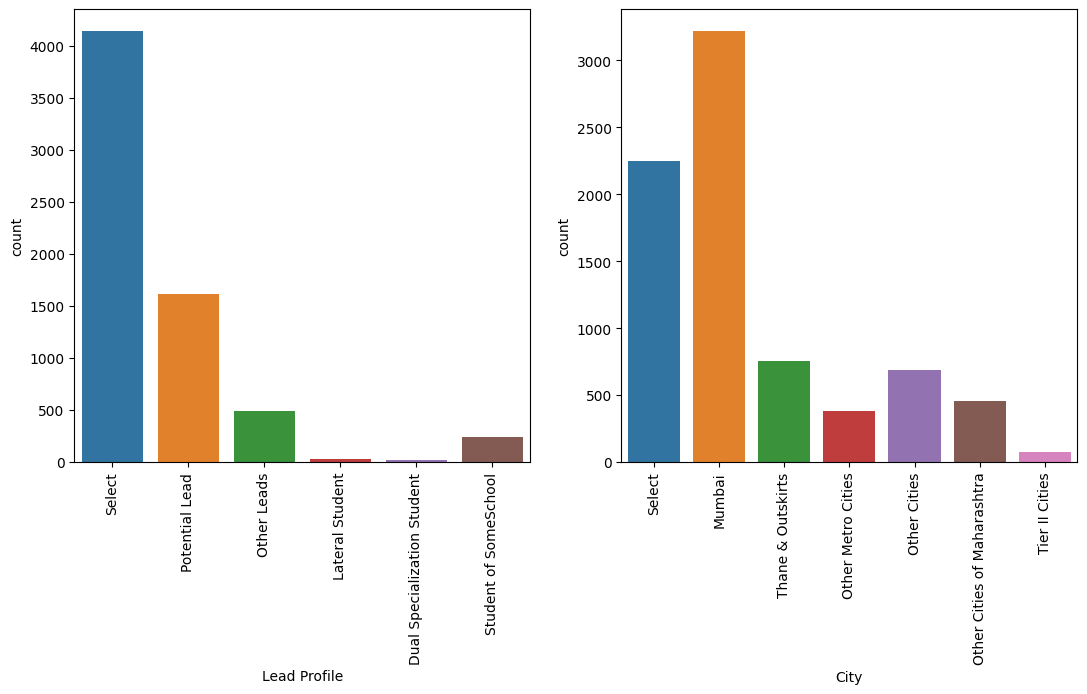

In [27]:
#visualizing count of Variable based on Converted value
#plt.figure(figsize=(15,5))

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(x= 'Lead Profile', data = leads_df)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x= 'City', data = leads_df)
plt.xticks(rotation=90)



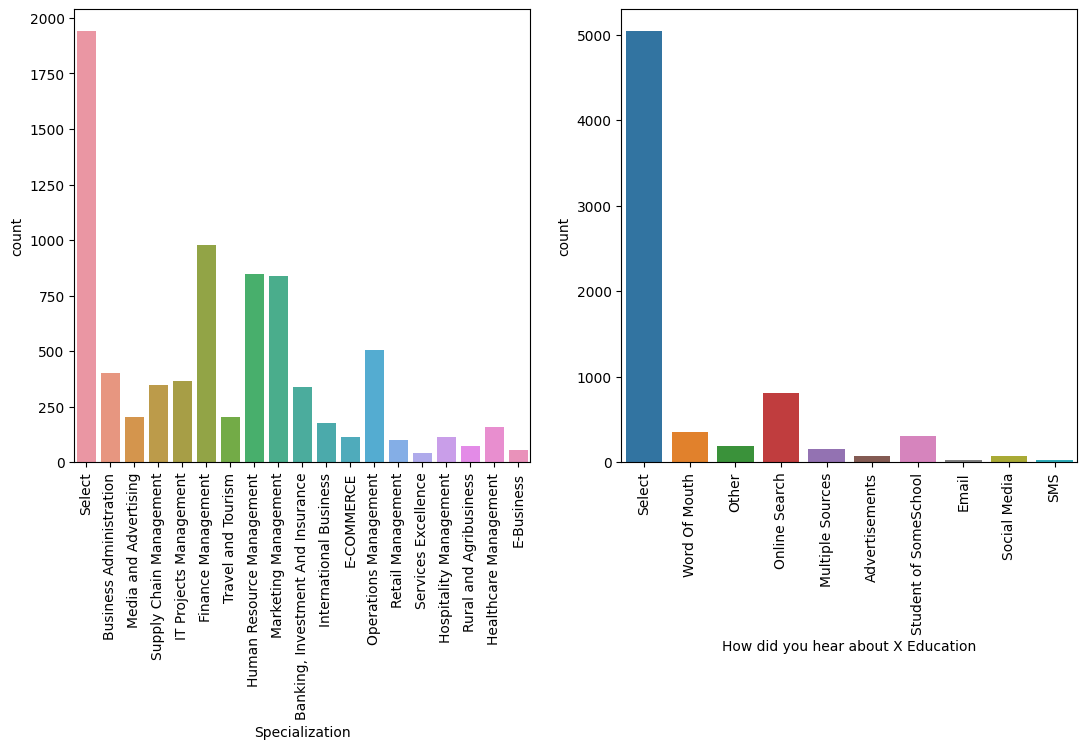

In [28]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(x= 'Specialization', data = leads_df)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.countplot(x= 'How did you hear about X Education', data = leads_df)
plt.xticks(rotation=90)
plt.show()

#### Filling the Select value in the above columns with NaN as this does not give any info

In [29]:
# Columns after converting Select value in the columns to NaN value.
leads_df[col_list_select] = leads_df[col_list_select].replace('Select', np.NaN)

In [30]:
# Value counts for columns after converting Select value in the columns to NaN value.
for i in col_list_select:
    print (leads_df[i].value_counts(dropna=False),"\n\n")

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 


NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sourc

### Imputation/Deletion of null values in the columns  

In [31]:
# Finding the Null values in the columns once again after making changes to dataset
leads_df.isna().sum().sort_values(ascending=False)/len(leads_df)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
A free copy of Mastering The Interview            0.000000
Lead Origin                                       0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Email                                      0.0000

#### Data cleaning further as per new data. 

In [32]:
#Drop cols which are having null values more than 40%
missing_percentage = leads_df.isna().sum() / len(leads_df) * 100
drop_cols = missing_percentage[missing_percentage > 40].index.tolist()
leads_df = leads_df.drop(columns=drop_cols)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,0,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified


Insights:

Dropping columns which are having more than 40% missing data.

### Lead Origin 

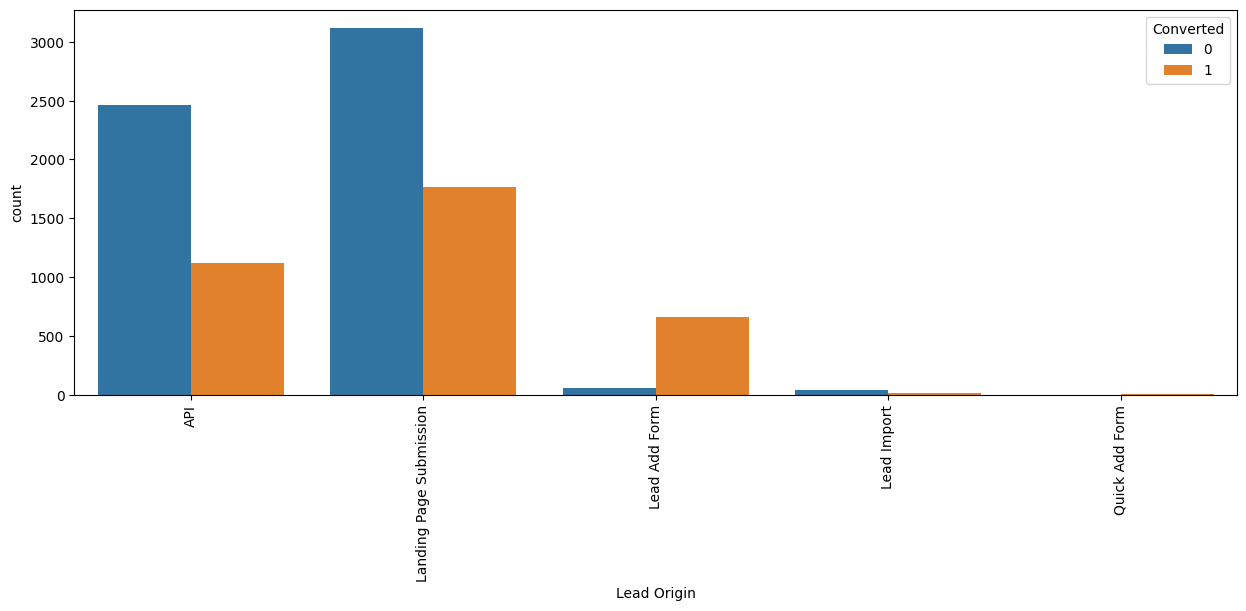

In [33]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Origin", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:

    Most leads are from API and Landing Page Submission
    Most converted leads are from "Lead Add Form".


### Total Time Spent on Website

(array([2.667e+03, 4.810e+02, 4.460e+02, 4.370e+02, 3.820e+02, 4.170e+02,
        3.400e+02, 3.210e+02, 2.480e+02, 1.920e+02, 1.400e+02, 1.100e+02,
        8.500e+01, 7.400e+01, 6.800e+01, 8.500e+01, 8.300e+01, 8.800e+01,
        8.800e+01, 1.160e+02, 1.360e+02, 1.090e+02, 1.390e+02, 1.470e+02,
        1.550e+02, 1.300e+02, 1.530e+02, 1.380e+02, 1.530e+02, 1.390e+02,
        1.240e+02, 1.250e+02, 1.230e+02, 9.900e+01, 1.020e+02, 7.900e+01,
        7.700e+01, 5.400e+01, 4.600e+01, 3.600e+01, 3.600e+01, 1.800e+01,
        1.500e+01, 1.700e+01, 3.000e+00, 6.000e+00, 5.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00]),
 array([   0.  ,   45.44,   90.88,  136.32,  181.76,  227.2 ,  272.64,
         318.08,  363.52,  408.96,  454.4 ,  499.84,  545.28,  590.72,
         636.16,  681.6 ,  727.04,  772.48,  817.92,  863.36,  908.8 ,
         954.24,  999.68, 1045.12, 1090.56, 1136.  , 1181.44, 1226.88,
        1272.32, 1317.76, 1363.2 , 1408.64, 1454.08, 1499.52, 1544.96,
        1590.4 , 1635

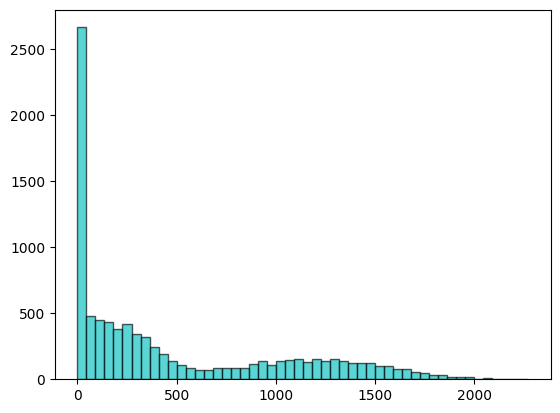

In [34]:
# Plot for EXT_SOURCE_3
plt.hist(leads_df["Total Time Spent on Website"], bins=50, color='c', edgecolor='k', alpha=0.65)

Insights:

    Maximum number of the leads are spent less than 45 mins.
    Most of the leads that spend between 45 mins and 272 mins

### Last Notable Activity

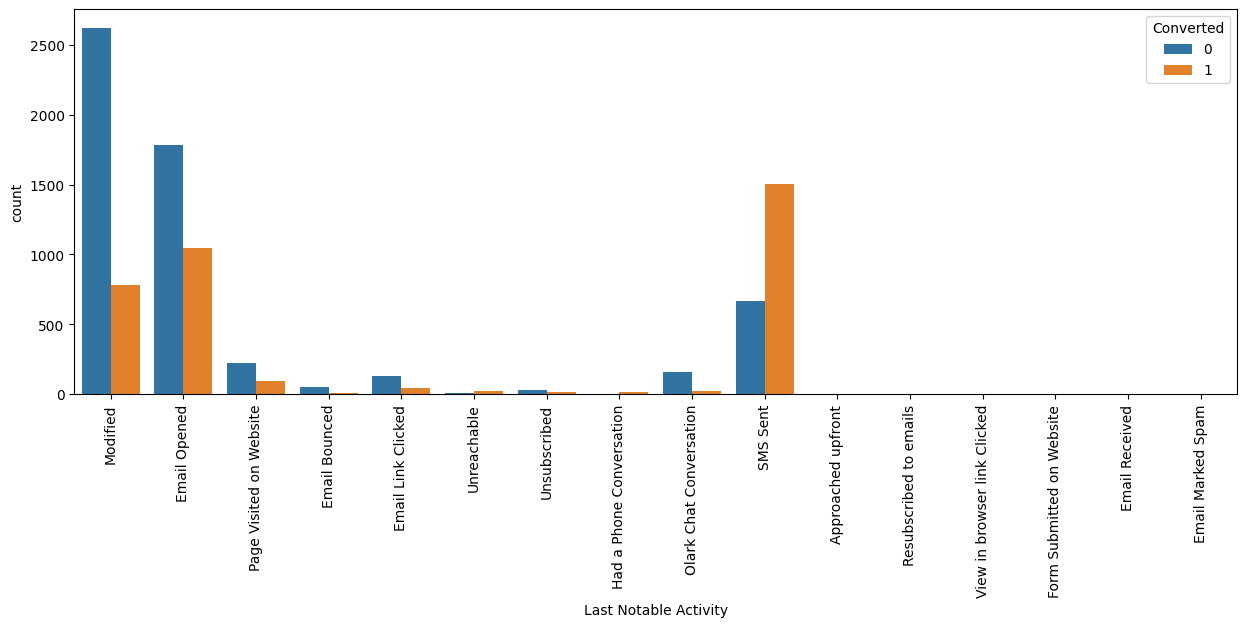

In [35]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Last Notable Activity", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:
    
    Most of the leads and converted leads are from Modified, Email Opened and SMS sent.

### Lead Source column:

In [36]:
# Lead source has multiple values with case sensitive. Converting them to lower case.
leads_df["Lead Source"] = leads_df["Lead Source"].str.lower()

In [37]:
leads_df["Lead Source"].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [38]:
# Converting NaN values to Others sources. Imputing with new values.
leads_df["Lead Source"] = leads_df["Lead Source"].replace(np.nan, "others")

In [39]:
#Aggregating some values into social media
leads_df["Lead Source"] = leads_df["Lead Source"].replace(["nc_edm","blog","welearn","welearnblog_home","pay per click ads","testone","youtubechannel","live chat","bing","click2call","press_release"], "social media")

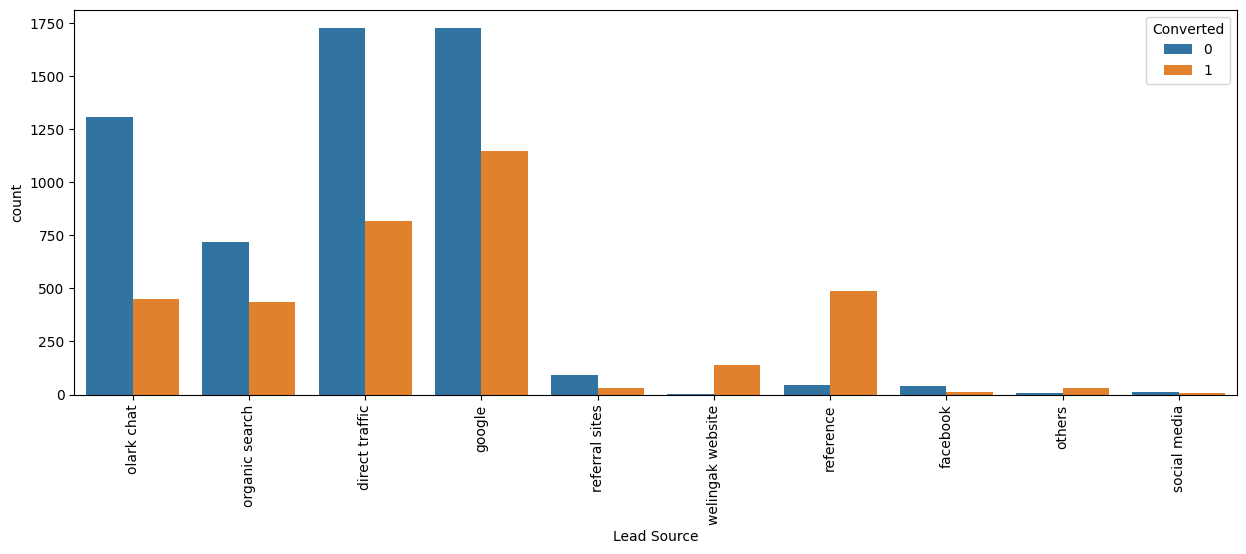

In [40]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Lead Source", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:
1. Most number of converted leads are obtained from google,direct traffic
2. Convertion rate is very high if it is through reference,welingak website
3. Should concentrate for overall convertion on olark chat, organic search,direct traffic and google.

### Country and City

In [41]:
# Value counts for Country
leads_df["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [42]:
# Value counts for City
leads_df["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [43]:
# Value counts for the both columns at a time.
leads_df[["City","Country"]].value_counts(dropna=False)

City                Country     
Mumbai              India           2918
NaN                 NaN             2055
                    India           1554
Thane & Outskirts   India            651
Other Cities        India            564
                                    ... 
Thane & Outskirts   Netherlands        1
                    Qatar              1
                    Saudi Arabia       1
Mumbai              Vietnam            1
Other Metro Cities  Tanzania           1
Length: 111, dtype: int64

Insights:
    
City column has 3669 and Country column has 2461 Null values.

Whereas the both columns are null for 2055 data points. 

Whereever the city with Nan and Country with India can still have the data.

In [44]:
# Dropping columns where the Country and City are both null
leads_df = leads_df.dropna(subset=["City", "Country"], how='all')

In [45]:
# Checking the column City where the Country column has null values
leads_df[leads_df["Country"].isnull()]["City"].value_counts()

Mumbai                         211
Thane & Outskirts               80
Other Cities                    55
Other Cities of Maharashtra     43
Other Metro Cities              15
Tier II Cities                   2
Name: City, dtype: int64

Insights:

Whereever Coutry column with null values have corresponding City values.

In [46]:
# Fillna of country with mode
country_mode = leads_df["Country"].mode()
leads_df["Country"] = leads_df["Country"].fillna(country_mode[0])

In [47]:
# Fillna of city with mode
leads_df["City"] = leads_df["City"].fillna(leads_df["City"].mode()[0])

In [48]:
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                        68
Total Time Spent on Website                         0
Page Views Per Visit                               68
Last Activity                                      52
Country                                             0
Specialization                                   1593
What is your current occupation                  1852
What matters most to you in choosing a course    1871
Tags                                             2211
City                                                0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

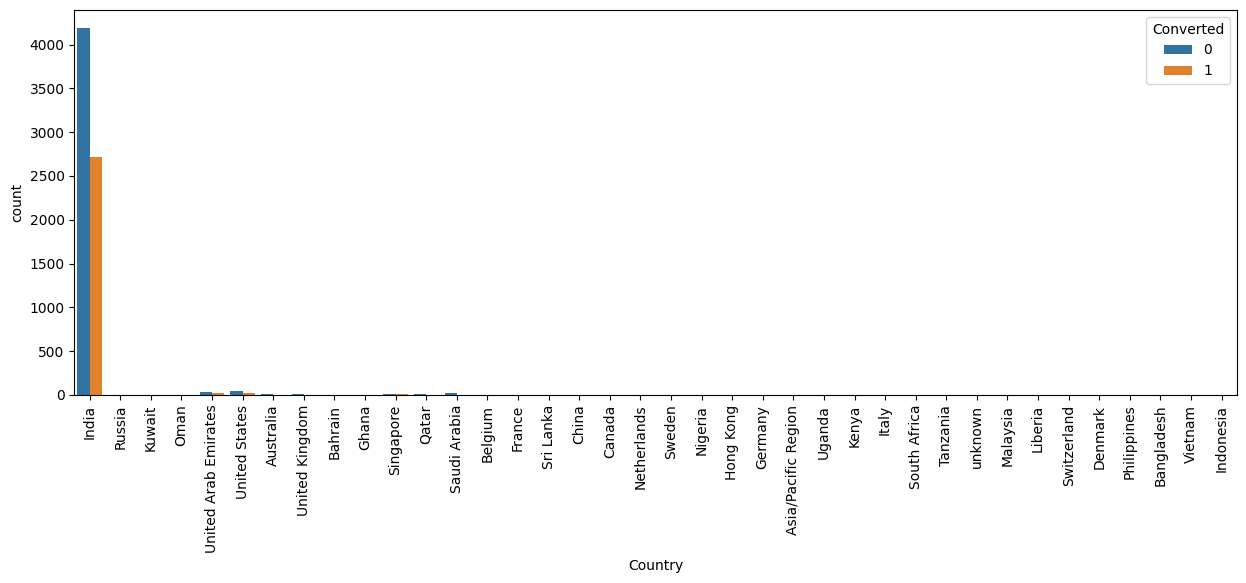

In [49]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Country", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [50]:
leads_df["Country"].value_counts()/len(leads_df["Country"])*100

India                   96.005567
United States            0.960334
United Arab Emirates     0.737648
Singapore                0.334029
Saudi Arabia             0.292276
United Kingdom           0.208768
Australia                0.180932
Qatar                    0.139179
Hong Kong                0.097425
Bahrain                  0.097425
Oman                     0.083507
France                   0.083507
unknown                  0.069589
South Africa             0.055672
Nigeria                  0.055672
Germany                  0.055672
Kuwait                   0.055672
Canada                   0.055672
Sweden                   0.041754
China                    0.027836
Asia/Pacific Region      0.027836
Uganda                   0.027836
Bangladesh               0.027836
Italy                    0.027836
Belgium                  0.027836
Netherlands              0.027836
Ghana                    0.027836
Philippines              0.027836
Russia                   0.013918
Switzerland   

In [51]:
# As there is imbalance data we can drop this column
leads_df = leads_df.drop("Country",axis=1)

#### Insights:

As there is imbalance data in country column. We are dropping this column

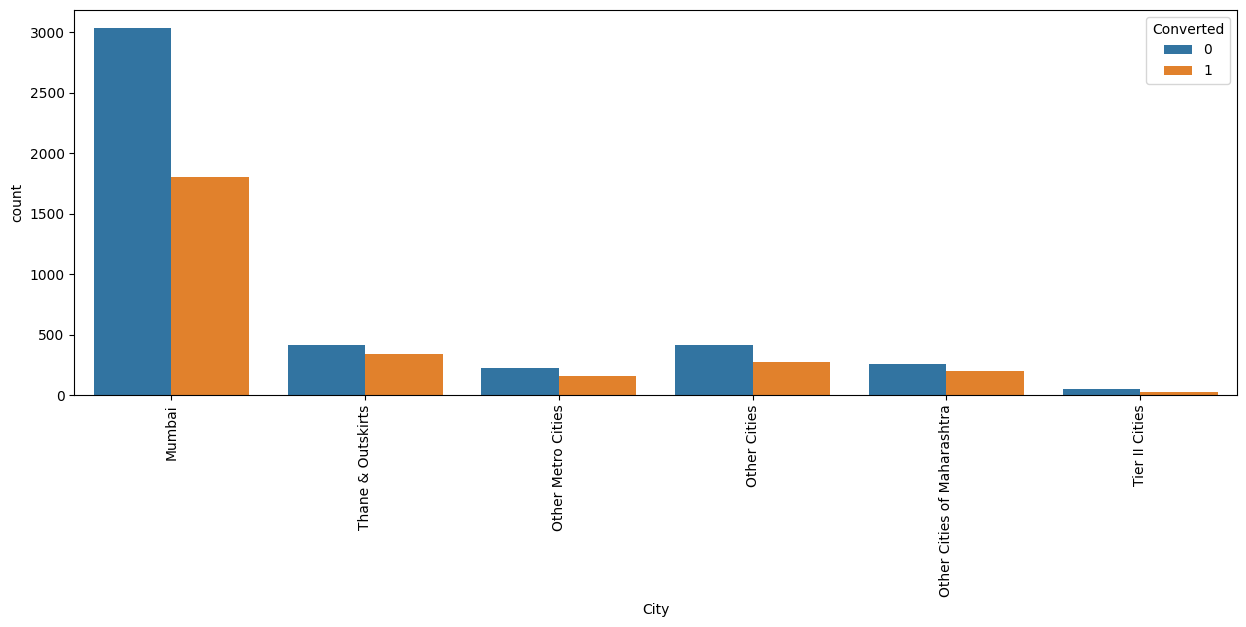

In [52]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="City", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:

Most of the leads are from Mumbai, Thane and Outskirts.

Very least is from Tier 2 cities.

### Total Visits

In [53]:
leads_df["TotalVisits"].value_counts(dropna=False)

2.0      1664
3.0      1288
4.0      1111
5.0       777
6.0       463
1.0       373
7.0       308
0.0       284
8.0       224
9.0       163
10.0      114
11.0       84
NaN        68
13.0       48
12.0       45
14.0       36
16.0       19
15.0       18
17.0       15
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [54]:
# As there are 68 NaN values. Fillna of Total visits with Median value
leads_df["TotalVisits"] = leads_df["TotalVisits"].fillna(leads_df["TotalVisits"].median())

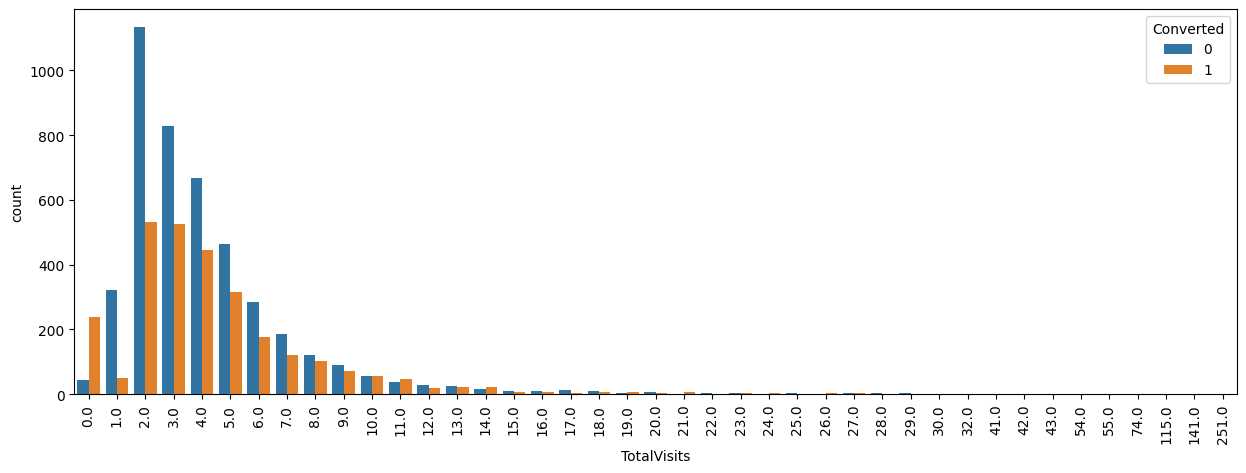

In [55]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="TotalVisits", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:

    Total number of leads are high for the visits of 2,3,4
    For the totalvisits of 2,3,4 constitutes the majority leads converted.
    There is high converted leads for 0 visits. This may be through referrels.

### Page Views Per Visit

In [56]:
# Value counts for page views
leads_df["Page Views Per Visit"].value_counts(dropna=False)

2.00    1784
3.00    1192
4.00     891
1.00     616
5.00     516
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [57]:
# Unique values
leads_df["Page Views Per Visit"].unique()

array([ 2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,  6.  ,
        3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  0.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  2.57,
        2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,  3.2 ,
        1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,  1.83,
        3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,  2.9 ,
        1.23,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,  1.86,  2.29,
       12.33,  3.43,  2.56,  6.33,  1.64,  8.21,  4.4 ,  5.33,  3.17,
        8.33,  1.48,  1.22,  1.78, 24.  ,  3.75,  6.67,  1.54,  2.13,
        2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,  3.8 ,
        1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [58]:
# Fillna with median value
leads_df["Page Views Per Visit"] = leads_df["Page Views Per Visit"].fillna(leads_df["Page Views Per Visit"].median())

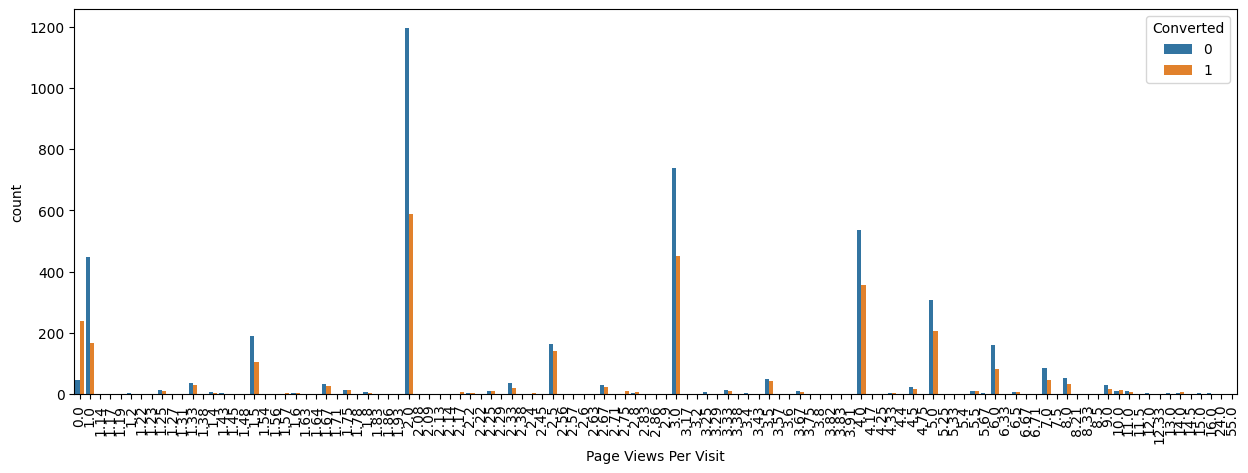

In [59]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Page Views Per Visit", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Count'>

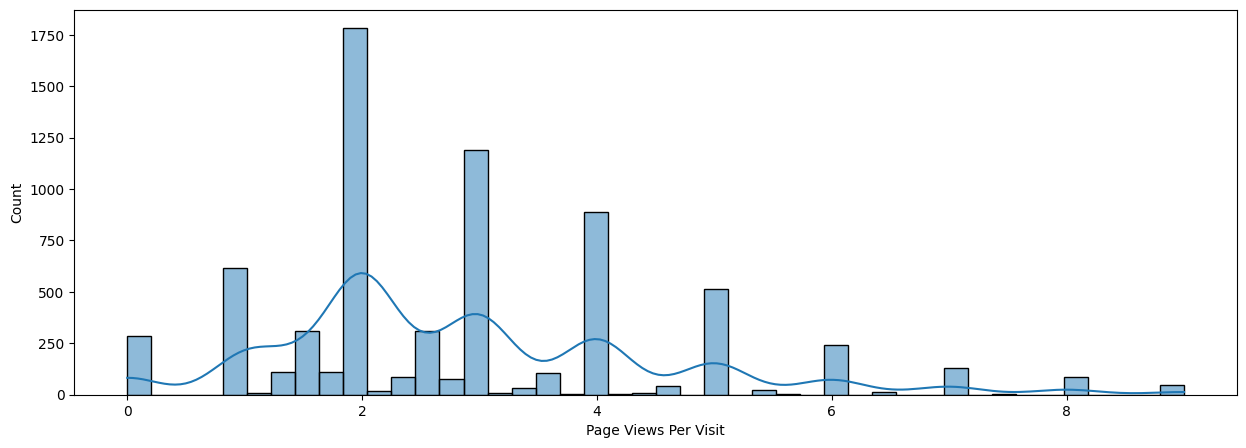

In [224]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.histplot(leads_df['Page Views Per Visit'], kde=True)

Insights:

    Most Customers visited 2,3,4 per visit 

### Last Activity

In [60]:
# Value counts for column
leads_df["Last Activity"].value_counts(dropna=False)

Email Opened                    2842
SMS Sent                        2184
Page Visited on Website          605
Converted to Lead                425
Olark Chat Conversation          330
Email Bounced                    272
Email Link Clicked               178
Form Submitted on Website        116
Unreachable                       87
Unsubscribed                      55
NaN                               52
Had a Phone Conversation          26
View in browser link Clicked       5
Approached upfront                 4
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

In [61]:
# Fillna with Mode
leads_df["Last Activity"] = leads_df["Last Activity"].fillna(leads_df["Last Activity"].mode()[0])

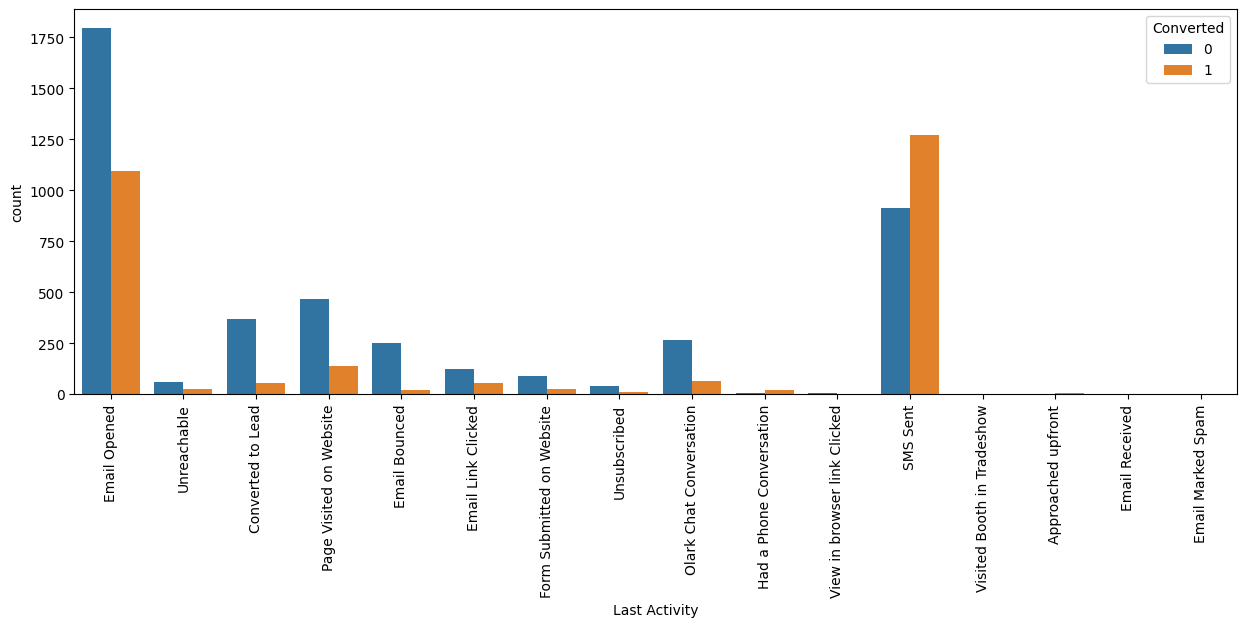

In [62]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Last Activity", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

#### Insights:
    
    The major converted leads are from "Email Opened" and "SMS sent"
    These options can be used efficiently for better converted ratio

### Specialization

In [63]:
# Value counts for column
leads_df["Specialization"].value_counts(dropna=False)

NaN                                  1593
Finance Management                    938
Human Resource Management             800
Marketing Management                  764
Operations Management                 475
Business Administration               384
IT Projects Management                361
Supply Chain Management               337
Banking, Investment And Insurance     314
Media and Advertising                 202
Travel and Tourism                    201
International Business                173
Healthcare Management                 153
Hospitality Management                112
E-COMMERCE                            111
Retail Management                      99
Rural and Agribusiness                 71
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As NaN are significant in number, we are considering with different name.

In [64]:
# Fillna with "Not Specified" by the customer
leads_df["Specialization"] = leads_df["Specialization"].replace(np.nan, "Not Specified")

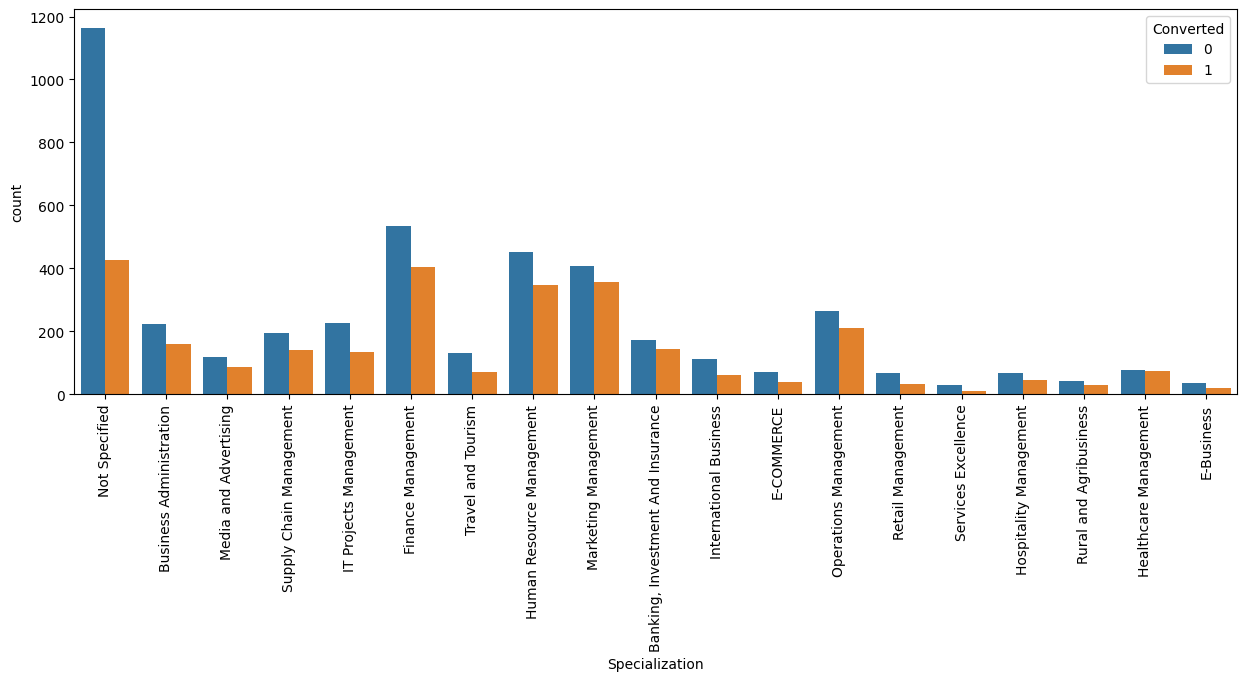

In [65]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Specialization", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:
    
    Most of the leads are from Not specified, Finance, HR, Marketing and Operation Management

### What is your current occupation

In [66]:
# Value counts for column
leads_df["What is your current occupation"].value_counts(dropna=False)

Unemployed              4620
NaN                     1852
Working Professional     519
Student                  161
Other                     16
Housewife                 10
Businessman                7
Name: What is your current occupation, dtype: int64

As the NaN values are significant we have to fill with mode

In [67]:
# Fillna with Mode
leads_df["What is your current occupation"]= leads_df["What is your current occupation"].fillna(leads_df["What is your current occupation"].mode()[0])

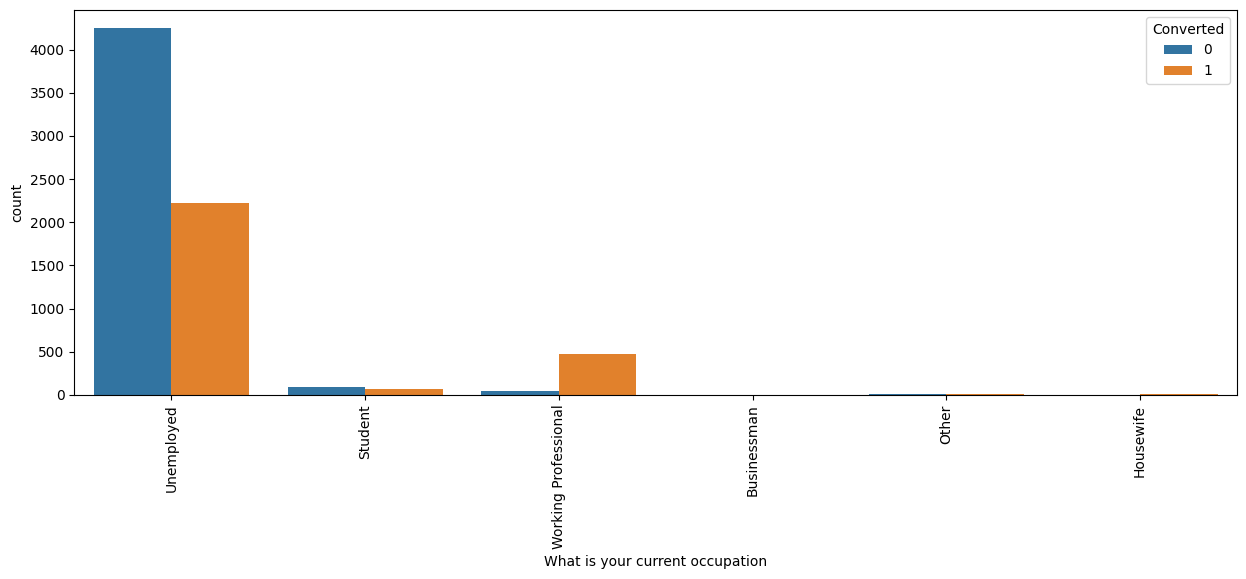

In [68]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="What is your current occupation", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:

    Most of the converted leads are from Unemployed and Working Professional.
    Least number of leads are from BusinessMan Others and Housewife and Student
    Most converted lead ratio is for Working Professional

### Tags

In [69]:

# Value counts for column
leads_df["Tags"].value_counts(dropna=False,normalize=True)

NaN                                                  0.307724
Will revert after reading the email                  0.244816
Ringing                                              0.150035
Interested in other courses                          0.057481
Already a student                                    0.048156
Closed by Horizzon                                   0.033542
switched off                                         0.031872
Busy                                                 0.024356
Lost to EINS                                         0.019485
Not doing further education                          0.018511
Interested  in full time MBA                         0.013779
Graduation in progress                               0.013361
invalid number                                       0.010578
Diploma holder (Not Eligible)                        0.006681
wrong number given                                   0.006124
opp hangup                                           0.004175
number n

In [70]:
# Fillna with new value "No Response"
leads_df["Tags"]=leads_df["Tags"].fillna("No Response")

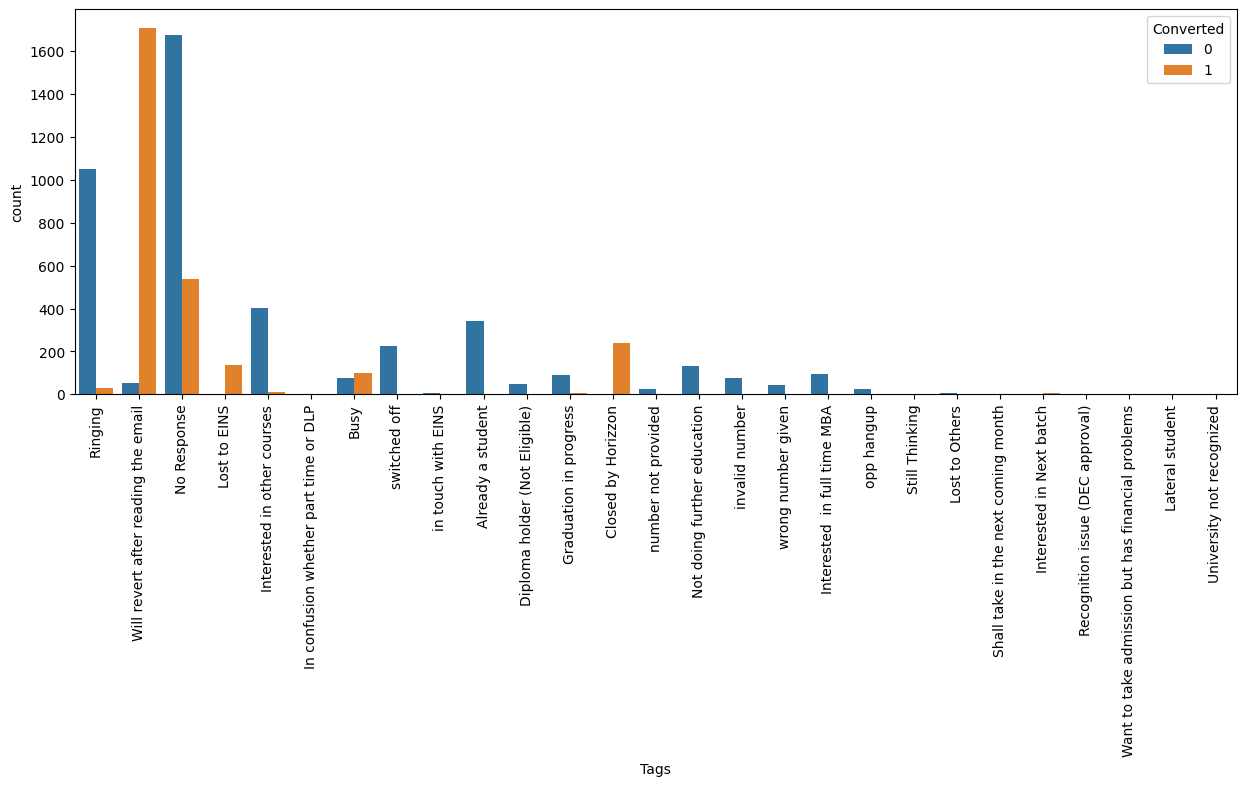

In [71]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x="Tags", data = leads_df,hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Insights:
    
    Most of the converted leads ratio are from the customers who "will revert after reading email", "Closed by Horizzon" and "No Response".
    Most of the leads from "Ringing" where the turnout ratio is very less.

### What matters most to you in choosing a course

In [72]:
# Value counts for column
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      5311
NaN                          1871
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Insights:

As the Nan values are significant we can change them to mode

In [73]:
# Fillna with Mode
leads_df["What matters most to you in choosing a course"] = leads_df["What matters most to you in choosing a course"].fillna(leads_df["What matters most to you in choosing a course"].mode()[0])

In [74]:
# Value counts for the column
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      7182
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [75]:
# Dropping  imbalanced data columns
leads_df = leads_df.drop(columns="What matters most to you in choosing a course" , axis=1)

Insights:

As the data is imbalanced after fillna with Mode we can drop this column.

In [76]:
# Finding the missing values in the columns
leads_df.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Insights: No more missing data.

In [77]:
# Shape of data set after cleaning the data

leads_df.shape

(7185, 14)

In [78]:
 # determine unique values
for k in leads_df.select_dtypes(include='object'):
    print('{} -- {}'.format(k,leads_df[k].unique()))

Lead Origin -- ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source -- ['organic search' 'direct traffic' 'google' 'referral sites' 'olark chat'
 'reference' 'welingak website' 'facebook' 'social media' 'others']
Do Not Email -- ['No' 'Yes']
Last Activity -- ['Email Opened' 'Unreachable' 'Converted to Lead'
 'Page Visited on Website' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Website' 'Unsubscribed' 'Olark Chat Conversation'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront' 'Email Received'
 'Email Marked Spam']
Specialization -- ['Not Specified' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Serv

In [79]:
# Columns details
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [80]:
# Information about dataset after data cleaning
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7185 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7185 non-null   object 
 1   Lead Source                             7185 non-null   object 
 2   Do Not Email                            7185 non-null   object 
 3   Converted                               7185 non-null   int64  
 4   TotalVisits                             7185 non-null   float64
 5   Total Time Spent on Website             7185 non-null   int64  
 6   Page Views Per Visit                    7185 non-null   float64
 7   Last Activity                           7185 non-null   object 
 8   Specialization                          7185 non-null   object 
 9   What is your current occupation         7185 non-null   object 
 10  Tags                                    7185 non-null   obje

#### Insights:
    
There are 14 columns after data cleaning.

There are no null values/

In [81]:
# Correlation between columns
cols = ["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit","A free copy of Mastering The Interview"]

<AxesSubplot:>

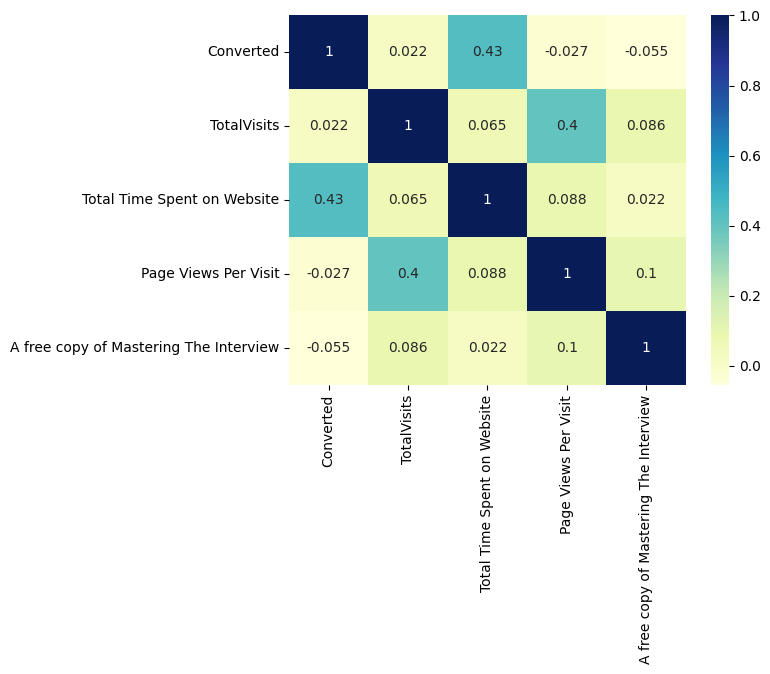

In [82]:
# Heatmap for corr()
sns.heatmap(leads_df.corr(), cmap="YlGnBu", annot=True)

#### Insights:

    There is good correlation between "Total time spent on website" and "Converted"
    There is good correlation between "Page Views Per Visit" and "TotalVisits"
    Least correlation is between Converted and TotalVisits.

### Check for outliers in numerical columns

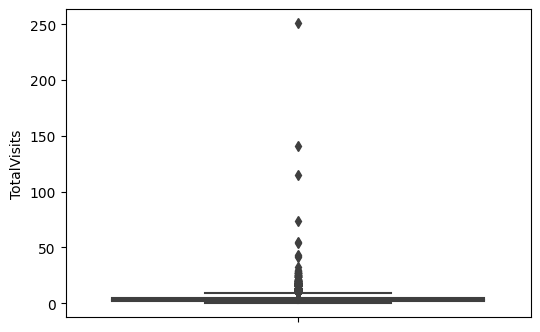

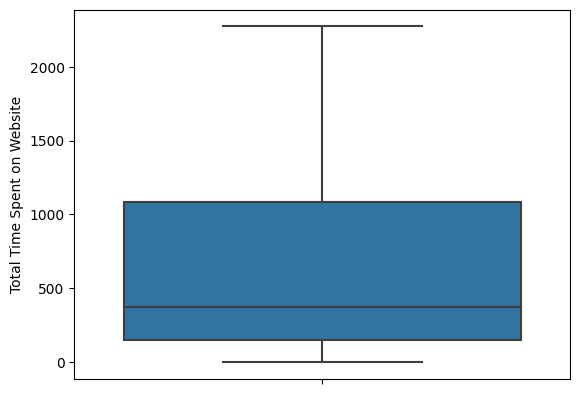

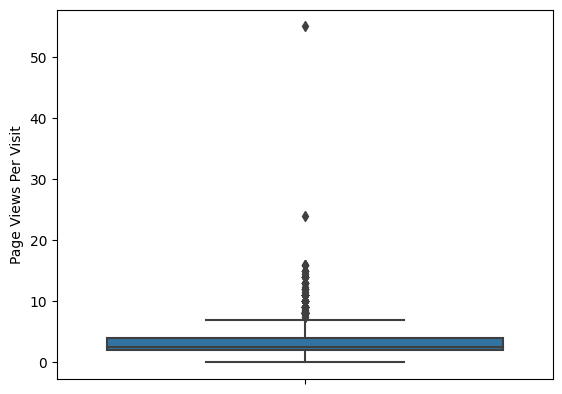

In [83]:
#Observing the columns "TotalVisits","Total Time Spent on Website","Page Views Per Visit"
plt.figure(figsize=(6,4))
for column in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
    sns.boxplot(y=leads_df[column])
    plt.show()

Insights:

    There are outliers in the data for the above columns
    We can perform some data cleaning wrt the outliers

In [84]:
# Checking the outliers wrt percentiles - TotalVisits column
leads_df['TotalVisits'].describe(percentiles=[0.01,.25, .5, .75,  .95, .99])

count    7185.000000
mean        4.354489
std         5.076395
min         0.000000
1%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [85]:
# We can remove the outlier in the data which is above 99% and below 1%
leads_df = leads_df[(leads_df.TotalVisits <= leads_df.TotalVisits.quantile(0.99))]
leads_df = leads_df[(leads_df.TotalVisits >= leads_df.TotalVisits.quantile(0.01))]

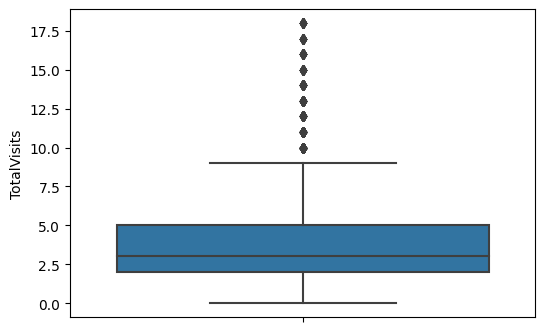

In [86]:
# Box plot for the column
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [87]:
# Page Views Per Visit 
# Checking the outliers wrt percentiles

leads_df['Page Views Per Visit'].describe(percentiles=[0.01,.25, .5, .75,  .95, .99])

count    7117.000000
mean        2.971850
std         1.873976
min         0.000000
1%          0.000000
25%         2.000000
50%         2.500000
75%         4.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [88]:
# We can remove the outlier in the data which is above 99%
leads_df = leads_df[(leads_df['Page Views Per Visit'] <= leads_df['Page Views Per Visit'].quantile(0.99))]
leads_df = leads_df[(leads_df['Page Views Per Visit'] >= leads_df['Page Views Per Visit'].quantile(0.01))]

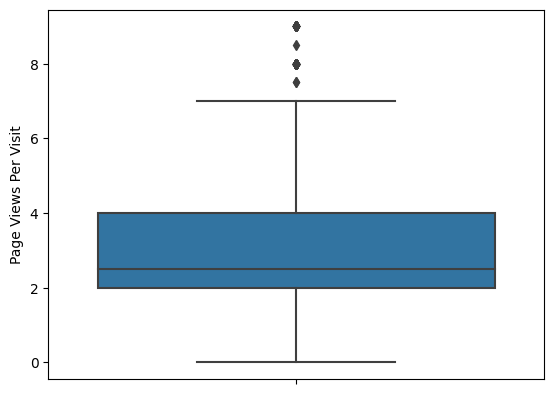

In [89]:
# Box plot for the column
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

In [90]:
# Total Time Spent on Website
# Checking the outliers wrt percentiles

leads_df['Total Time Spent on Website'].describe(percentiles=[0.01,.25, .5, .75,  .95, .99])

count    7050.000000
mean      607.666383
std       546.183475
min         0.000000
1%          0.000000
25%       149.000000
50%       371.000000
75%      1081.000000
95%      1602.550000
99%      1860.530000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

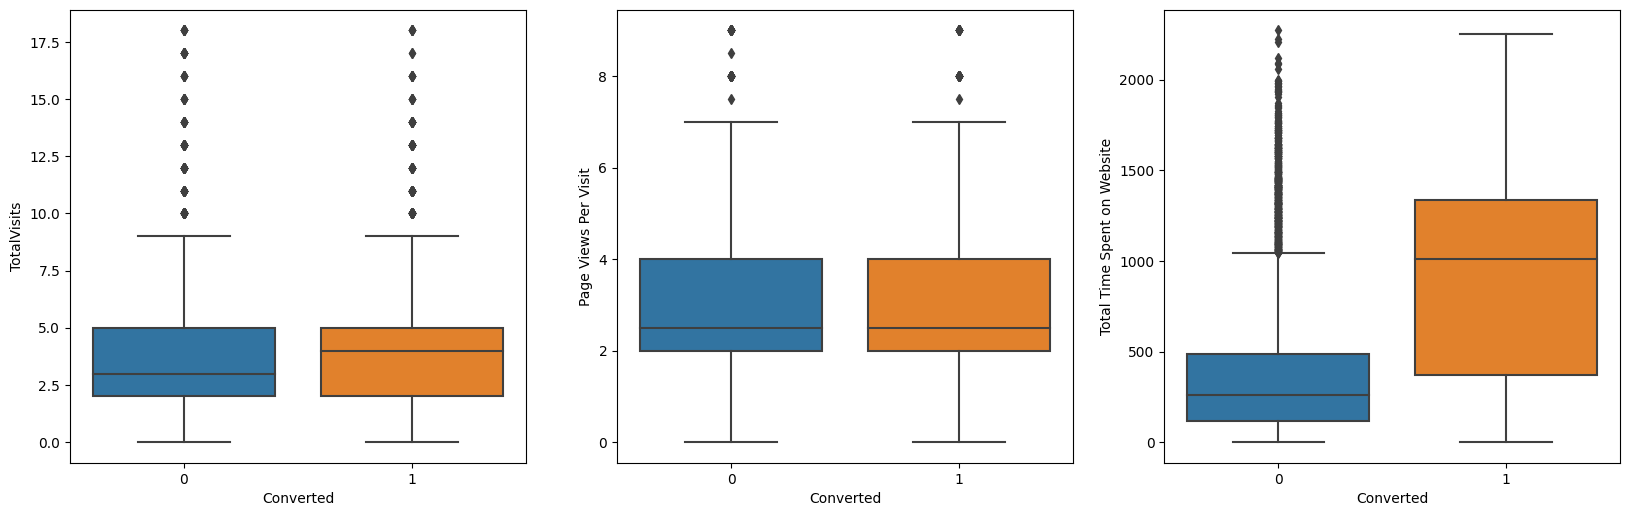

In [91]:
# Box plot for the columns wrt Converted column
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.boxplot(y="TotalVisits", x="Converted", data=leads_df)
plt.subplot(3,3,2)
sns.boxplot(y="Page Views Per Visit", x="Converted", data=leads_df)
plt.subplot(3,3,3)
sns.boxplot(y="Total Time Spent on Website", x="Converted", data=leads_df)
plt.show()

In [92]:
# The new shape of the dataset
leads_df.shape

(7050, 14)

In [93]:
# Data retained after data cleaning
leads_df.shape[0]/9240 * 100

76.2987012987013

Now your data doesn't have any null values. 76.2% data is retained

DATA CLEANING IS COMPLETED

## Data Preparation

Convert categorical columns into dummies using get_dummies() method

In [94]:
# Categorical and numeric columns in dataset

cat_columns = leads_df.select_dtypes(include=['object']).columns.to_list()
numeric_columns = leads_df.select_dtypes(exclude=['object']).columns.to_list()

In [95]:
# Creating dummies for the categorical columns and drop_first
leads_df= pd.get_dummies(data=leads_df, columns=cat_columns, drop_first=True)

In [96]:
# Head of the data
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Insights:

After dummying the data there are 102 columns.

## Test-Train Split

In [97]:
# Importing libraries
from sklearn.model_selection import train_test_split

In [98]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [99]:
# Putting feature variables to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
# Shape of train data
X_train.shape

(4935, 101)

In [102]:
# Shape of test data
X_test.shape

(2115, 101)

## Feature Scaling

In [103]:
# Importing libraries
from sklearn.preprocessing import StandardScaler

In [104]:
#Numerical columns
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [105]:
# Scaling the numerical columns using StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7551,0.356701,-0.373749,1.264971,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6459,-0.361650,-0.669575,0.069924,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1045,-0.720825,-0.526256,-0.527599,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5019,0.715876,2.479783,-0.826361,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8259,-0.720825,-0.471133,-0.527599,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [106]:
### Checking the Converted Rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.82269503546099

## Looking at Correlations

In [107]:
# Let's see the correlation matrix 
leads_df.corr()
#leads_df.corr().to_csv("corr.csv")

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.035603,0.431474,-0.034747,-0.057387,-0.082306,0.217033,-0.026588,0.014952,-0.027631,...,0.014952,-0.009488,0.047171,-0.229846,-0.018033,-0.041162,0.307080,0.046292,-0.018822,-0.009488
TotalVisits,0.035603,1.000000,0.119780,0.563652,0.112877,0.180031,-0.210408,-0.080785,-0.004398,-0.080064,...,0.008549,-0.008714,0.018870,-0.151281,0.044878,0.201540,0.016685,0.003494,-0.007966,0.017180
Total Time Spent on Website,0.431474,0.119780,1.000000,0.096482,0.021000,0.055078,-0.106273,-0.058370,0.035097,-0.058490,...,0.003344,-0.006993,0.018448,-0.108311,0.011860,-0.010594,0.164262,0.000144,-0.006931,-0.011311
Page Views Per Visit,-0.034747,0.563652,0.096482,1.000000,0.095617,0.292158,-0.251982,-0.085950,-0.002778,-0.084096,...,0.000798,-0.006354,0.005063,-0.104326,-0.016730,-0.022782,0.090665,0.015383,0.006803,-0.001562
A free copy of Mastering The Interview,-0.057387,0.112877,0.021000,0.095617,1.000000,0.473838,-0.128287,-0.071501,-0.009693,-0.072165,...,-0.009693,0.014635,-0.014720,-0.063793,-0.011035,0.009421,0.024589,-0.004243,0.013961,0.014635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,-0.041162,0.201540,-0.010594,-0.022782,0.009421,0.006754,-0.005605,-0.017465,-0.002368,-0.017627,...,-0.002368,-0.002368,-0.008544,-0.144803,-0.019472,1.000000,-0.111665,-0.012995,-0.015204,-0.002368
Last Notable Activity_SMS Sent,0.307080,0.016685,0.164262,0.090665,0.024589,0.064164,-0.038382,-0.045541,-0.006691,-0.042259,...,-0.006691,-0.006691,-0.024144,-0.409184,-0.055023,-0.111665,1.000000,-0.036722,-0.042963,-0.006691
Last Notable Activity_Unreachable,0.046292,0.003494,0.000144,0.015383,-0.004243,-0.015600,0.023097,-0.005743,-0.000779,-0.005797,...,-0.000779,-0.000779,-0.002810,-0.047619,-0.006403,-0.012995,-0.036722,1.000000,-0.005000,-0.000779
Last Notable Activity_Unsubscribed,-0.018822,-0.007966,-0.006931,0.006803,0.013961,0.004774,-0.004428,-0.006719,-0.000911,-0.006782,...,-0.000911,-0.000911,-0.003287,-0.055712,-0.007492,-0.015204,-0.042963,-0.005000,1.000000,-0.000911


## Model Building using Stats Model & RFE

In [108]:
#Importing libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#create a LogisticRegression object "logreg"
logreg = LogisticRegression()

# Importing RFE libraries and fit model with 15 features
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [109]:
# Let's take a look at which features have been selected by RFE
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [110]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 55),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 57),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 45),
 ('Lead Source_facebook', False, 52),
 ('Lead Source_google', False, 61),
 ('Lead Source_olark chat', False, 4),
 ('Lead Source_organic search', False, 83),
 ('Lead Source_others', False, 30),
 ('Lead Source_reference', False, 40),
 ('Lead Source_referral sites', False, 20),
 ('Lead Source_social media', False, 43),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_Yes', False, 13),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 64),
 ('Last Activity_Email Marked Spam', False, 86),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Email Rec

In [111]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [112]:
# Select only the columns selected by RFE
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_welingak website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_No Response', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

#### Model1

In [113]:
# Creating model with col values
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -933.26
Date:                Tue, 22 Oct 2024   Deviance:                       1866.5
Time:                        23:42:20   Pearson chi2:                 8.48e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6174
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7805      0.227    -16.623      0.000      -4.226      -3.335
Total Time Spent on Website                  1.1576      0.064     17.998      0.000       1.032       1.284
Lead Origin_Lead Add Form                    1.4685      0.527      2.785      0.005       0.435       2.502
Lead Source_welingak website                24.0402   2.81e+04      0.001      0.999    -5.5e+04    5.51e+04
Last Activity_Converted to Lead             -1.2452      0.333     -3.737      0.000      -1.898      -0.592
Last Activity_Email Bounced                 -1.6436      0.476     -3.456      0.001      -2.576      -0.711
Tags_Busy                                    2.6890      0.323      8.334      0.000       2.057       3.321
Tags_Closed by Horizzon                      8.7137      1.045      8.340      0.000       6.666      10.762
Tags_Lost to EINS                            7.2684      0.649     11.194      0.000       5.996       8.541
Tags_No Response                             2.0461      0.236      8.665      0.000       1.583       2.509
Tags_Ringing                                -1.1928      0.341     -3.498      0.000      -1.861      -0.525
Tags_Will revert after reading the email     6.5806      0.287     22.914      0.000       6.018       7.143
Tags_invalid number                        -22.6206   1.62e+04     -0.001      0.999   -3.18e+04    3.18e+04
Tags_switched off                           -1.3537      0.644     -2.103      0.035      -2.615      -0.092
Tags_wrong number given                    -22.0511      2e+04     -0.001      0.999   -3.92e+04    3.91e+04
Last Notable Activity_SMS Sent               2.1630      0.147     14.720      0.000       1.875       2.451
============================================================================================================
"""

In [114]:
# Check for the VIF values of the feature variables.  Import variable.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,1.60
10,Tags_Will revert after reading the email,1.48
1,Lead Origin_Lead Add Form,1.36
0,Total Time Spent on Website,1.18
6,Tags_Closed by Horizzon,1.17
8,Tags_No Response,1.14
9,Tags_Ringing,1.12
2,Lead Source_welingak website,1.09
3,Last Activity_Converted to Lead,1.05
4,Last Activity_Email Bounced,1.05


Insights:

As the all VIF values are less than 5. Dropping column with high p-value "Tags_invalid number"

In [116]:
#dropping column with high p-value

col = col.drop('Tags_invalid number',1)

#### Model2

In [117]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4920
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -937.22
Date:                Tue, 22 Oct 2024   Deviance:                       1874.4
Time:                        23:42:21   Pearson chi2:                 8.35e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6168
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9004      0.230    -16.958      0.000      -4.351      -3.450
Total Time Spent on Website                  1.1526      0.064     18.000      0.000       1.027       1.278
Lead Origin_Lead Add Form                    1.4732      0.531      2.776      0.006       0.433       2.513
Lead Source_welingak website                24.0251   2.81e+04      0.001      0.999   -5.51e+04    5.51e+04
Last Activity_Converted to Lead             -1.2401      0.334     -3.713      0.000      -1.895      -0.586
Last Activity_Email Bounced                 -1.6438      0.476     -3.456      0.001      -2.576      -0.712
Tags_Busy                                    2.8306      0.322      8.788      0.000       2.199       3.462
Tags_Closed by Horizzon                      8.8301      1.045      8.447      0.000       6.781      10.879
Tags_Lost to EINS                            7.3857      0.650     11.361      0.000       6.112       8.660
Tags_No Response                             2.1787      0.237      9.177      0.000       1.713       2.644
Tags_Ringing                                -1.0388      0.340     -3.058      0.002      -1.705      -0.373
Tags_Will revert after reading the email     6.7016      0.289     23.209      0.000       6.136       7.268
Tags_switched off                           -1.2013      0.643     -1.869      0.062      -2.461       0.059
Tags_wrong number given                    -21.8954      2e+04     -0.001      0.999   -3.92e+04    3.92e+04
Last Notable Activity_SMS Sent               2.1222      0.145     14.624      0.000       1.838       2.407
============================================================================================================
"""

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,1.58
10,Tags_Will revert after reading the email,1.48
1,Lead Origin_Lead Add Form,1.36
0,Total Time Spent on Website,1.18
6,Tags_Closed by Horizzon,1.17
8,Tags_No Response,1.14
9,Tags_Ringing,1.12
2,Lead Source_welingak website,1.09
3,Last Activity_Converted to Lead,1.05
4,Last Activity_Email Bounced,1.05


Insights:

As the all VIF values are less than 5. Dropping column with high p-value "Tags_wrong number given"

In [119]:
#dropping column with high p-value

col = col.drop('Tags_wrong number given',1)

#### Model3

In [120]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4921
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -939.61
Date:                Tue, 22 Oct 2024   Deviance:                       1879.2
Time:                        23:42:21   Pearson chi2:                 8.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6164
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9985      0.231    -17.322      0.000      -4.451      -3.546
Total Time Spent on Website                  1.1526      0.064     18.013      0.000       1.027       1.278
Lead Origin_Lead Add Form                    1.4794      0.533      2.774      0.006       0.434       2.525
Lead Source_welingak website                23.0164   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
Last Activity_Converted to Lead             -1.2359      0.335     -3.693      0.000      -1.892      -0.580
Last Activity_Email Bounced                 -1.6445      0.476     -3.455      0.001      -2.578      -0.712
Tags_Busy                                    2.9424      0.321      9.176      0.000       2.314       3.571
Tags_Closed by Horizzon                      8.9268      1.046      8.537      0.000       6.877      10.976
Tags_Lost to EINS                            7.4825      0.650     11.504      0.000       6.208       8.757
Tags_No Response                             2.2840      0.237      9.639      0.000       1.820       2.748
Tags_Ringing                                -0.9211      0.337     -2.729      0.006      -1.583      -0.260
Tags_Will revert after reading the email     6.8013      0.289     23.518      0.000       6.234       7.368
Tags_switched off                           -1.0834      0.642     -1.689      0.091      -2.341       0.174
Last Notable Activity_SMS Sent               2.0958      0.144     14.575      0.000       1.814       2.378
============================================================================================================
"""

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,1.57
10,Tags_Will revert after reading the email,1.48
1,Lead Origin_Lead Add Form,1.36
0,Total Time Spent on Website,1.18
6,Tags_Closed by Horizzon,1.17
8,Tags_No Response,1.13
9,Tags_Ringing,1.12
2,Lead Source_welingak website,1.09
3,Last Activity_Converted to Lead,1.05
5,Tags_Busy,1.05


Insights:

As the all VIF values are less than 5. Dropping column with high p-value "Lead Source_welingak website"

In [122]:
#dropping column with high p-value

col = col.drop('Lead Source_welingak website',1)

#### Model4

In [123]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4922
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -944.10
Date:                Tue, 22 Oct 2024   Deviance:                       1888.2
Time:                        23:42:21   Pearson chi2:                 8.46e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6157
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0110      0.231    -17.366      0.000      -4.464      -3.558
Total Time Spent on Website                  1.1485      0.064     18.017      0.000       1.024       1.273
Lead Origin_Lead Add Form                    2.3131      0.536      4.317      0.000       1.263       3.363
Last Activity_Converted to Lead             -1.2214      0.332     -3.678      0.000      -1.872      -0.570
Last Activity_Email Bounced                 -1.6586      0.478     -3.467      0.001      -2.596      -0.721
Tags_Busy                                    2.9440      0.320      9.191      0.000       2.316       3.572
Tags_Closed by Horizzon                      8.7948      1.043      8.430      0.000       6.750      10.840
Tags_Lost to EINS                            7.4806      0.650     11.502      0.000       6.206       8.755
Tags_No Response                             2.3097      0.237      9.751      0.000       1.845       2.774
Tags_Ringing                                -0.9067      0.337     -2.687      0.007      -1.568      -0.245
Tags_Will revert after reading the email     6.7670      0.287     23.575      0.000       6.204       7.330
Tags_switched off                           -1.0707      0.642     -1.669      0.095      -2.328       0.187
Last Notable Activity_SMS Sent               2.0971      0.143     14.650      0.000       1.817       2.378
============================================================================================================
"""

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,1.57
9,Tags_Will revert after reading the email,1.48
1,Lead Origin_Lead Add Form,1.26
0,Total Time Spent on Website,1.18
5,Tags_Closed by Horizzon,1.16
7,Tags_No Response,1.13
8,Tags_Ringing,1.12
2,Last Activity_Converted to Lead,1.05
4,Tags_Busy,1.05
3,Last Activity_Email Bounced,1.04


Insights:

As the all VIF values are less than 5. Dropping column with high p-value "Tags_switched off"

In [125]:
#dropping column with high p-value

col = col.drop('Tags_switched off',1)

#### Model5

In [126]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4923
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -945.83
Date:                Tue, 22 Oct 2024   Deviance:                       1891.7
Time:                        23:42:22   Pearson chi2:                 8.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6155
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1962      0.219    -19.130      0.000      -4.626      -3.766
Total Time Spent on Website                  1.1530      0.064     18.101      0.000       1.028       1.278
Lead Origin_Lead Add Form                    2.3418      0.542      4.318      0.000       1.279       3.405
Last Activity_Converted to Lead             -1.2159      0.333     -3.649      0.000      -1.869      -0.563
Last Activity_Email Bounced                 -1.6577      0.480     -3.455      0.001      -2.598      -0.717
Tags_Busy                                    3.1469      0.308     10.229      0.000       2.544       3.750
Tags_Closed by Horizzon                      8.9786      1.041      8.624      0.000       6.938      11.019
Tags_Lost to EINS                            7.6654      0.646     11.857      0.000       6.398       8.932
Tags_No Response                             2.5029      0.223     11.230      0.000       2.066       2.940
Tags_Ringing                                -0.6995      0.324     -2.158      0.031      -1.335      -0.064
Tags_Will revert after reading the email     6.9555      0.277     25.109      0.000       6.413       7.498
Last Notable Activity_SMS Sent               2.0627      0.141     14.610      0.000       1.786       2.339
============================================================================================================
"""

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_SMS Sent,1.52
9,Tags_Will revert after reading the email,1.47
1,Lead Origin_Lead Add Form,1.26
0,Total Time Spent on Website,1.17
5,Tags_Closed by Horizzon,1.16
7,Tags_No Response,1.13
8,Tags_Ringing,1.12
2,Last Activity_Converted to Lead,1.05
4,Tags_Busy,1.05
3,Last Activity_Email Bounced,1.04


Insights:

As the all VIF values are less than 5. Dropping column with high p-value "Tags_Ringing"

In [128]:
#dropping column with high p-value

col = col.drop('Tags_Ringing',1)

#### Model6 

In [129]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4924
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -948.20
Date:                Tue, 22 Oct 2024   Deviance:                       1896.4
Time:                        23:42:22   Pearson chi2:                 7.64e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6151
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5096      0.184    -24.520      0.000      -4.870      -4.149
Total Time Spent on Website                  1.1486      0.063     18.102      0.000       1.024       1.273
Lead Origin_Lead Add Form                    2.3741      0.553      4.297      0.000       1.291       3.457
Last Activity_Converted to Lead             -1.2065      0.335     -3.606      0.000      -1.862      -0.551
Last Activity_Email Bounced                 -1.6510      0.481     -3.431      0.001      -2.594      -0.708
Tags_Busy                                    3.4848      0.276     12.624      0.000       2.944       4.026
Tags_Closed by Horizzon                      9.2857      1.035      8.976      0.000       7.258      11.313
Tags_Lost to EINS                            7.9749      0.636     12.546      0.000       6.729       9.221
Tags_No Response                             2.8299      0.182     15.520      0.000       2.473       3.187
Tags_Will revert after reading the email     7.2700      0.249     29.157      0.000       6.781       7.759
Last Notable Activity_SMS Sent               2.0157      0.139     14.510      0.000       1.743       2.288
============================================================================================================
"""

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.45
9,Last Notable Activity_SMS Sent,1.39
1,Lead Origin_Lead Add Form,1.26
5,Tags_Closed by Horizzon,1.16
0,Total Time Spent on Website,1.15
7,Tags_No Response,1.12
2,Last Activity_Converted to Lead,1.04
3,Last Activity_Email Bounced,1.04
4,Tags_Busy,1.04
6,Tags_Lost to EINS,1.01


Insights:

As the all VIF values are less than 5. Dropping column  "Last Activity_Email Bounced"

In [131]:
#dropping column with p-value

col = col.drop('Last Activity_Email Bounced',1)

#### Model7

In [132]:
# Creating model with resultant col values
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4935
Model:                            GLM   Df Residuals:                     4925
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -955.87
Date:                Tue, 22 Oct 2024   Deviance:                       1911.7
Time:                        23:42:22   Pearson chi2:                 7.32e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6139
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5652      0.184    -24.873      0.000      -4.925      -4.205
Total Time Spent on Website                  1.1445      0.063     18.121      0.000       1.021       1.268
Lead Origin_Lead Add Form                    2.3928      0.556      4.306      0.000       1.304       3.482
Last Activity_Converted to Lead             -1.1530      0.336     -3.434      0.001      -1.811      -0.495
Tags_Busy                                    3.5070      0.276     12.686      0.000       2.965       4.049
Tags_Closed by Horizzon                      9.2238      1.027      8.978      0.000       7.210      11.237
Tags_Lost to EINS                            7.9949      0.635     12.584      0.000       6.750       9.240
Tags_No Response                             2.8151      0.182     15.467      0.000       2.458       3.172
Tags_Will revert after reading the email     7.2901      0.249     29.269      0.000       6.802       7.778
Last Notable Activity_SMS Sent               2.0766      0.138     15.006      0.000       1.805       2.348
============================================================================================================
"""

#### Checking VIFs

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.45
8,Last Notable Activity_SMS Sent,1.38
1,Lead Origin_Lead Add Form,1.26
4,Tags_Closed by Horizzon,1.16
0,Total Time Spent on Website,1.15
6,Tags_No Response,1.08
2,Last Activity_Converted to Lead,1.04
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.01


####  Insights:

Final list of features are 
Total Time Spent on Website, Lead Origin_Lead Add Form, Last Activity_Converted to Lead, Tags_Busy, Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_No Response, Tags_Will revert after reading the email, Last Notable Activity_SMS Sent

## Model Evaluation

In [134]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7551    0.006740
6459    0.004813
1045    0.893075
5019    0.999519
8259    0.006033
4378    0.997314
2845    0.076474
5727    0.187707
3594    0.568123
6064    0.434856
dtype: float64

In [135]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0067398 , 0.00481331, 0.8930753 , 0.99951923, 0.00603323,
       0.99731352, 0.07647436, 0.18770677, 0.56812325, 0.43485588])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [136]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.006740,7551
1,0,0.004813,6459
2,1,0.893075,1045
3,1,0.999519,5019
4,0,0.006033,8259


##### Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0

In [137]:
# Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.006740,7551,0
1,0,0.004813,6459,0
2,1,0.893075,1045,1
3,1,0.999519,5019,1
4,0,0.006033,8259,0


##### Confusion matrix 

In [138]:
# importing libraries
from sklearn import metrics

In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2872  130]
 [ 222 1711]]


In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9286727456940223


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8851526125193999

In [143]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.9566955363091273

In [144]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
FP/ float(TN+FP)

0.04330446369087275

In [145]:
# positive predictive value 
print (TP / float(TP+FP))

0.9293862031504617


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9282482223658695


In [147]:
##### Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9293862031504617

In [148]:
##### Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8851526125193999

### PLOTTING ROC CURVE

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [149]:
# Function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
# Call the ROC function
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

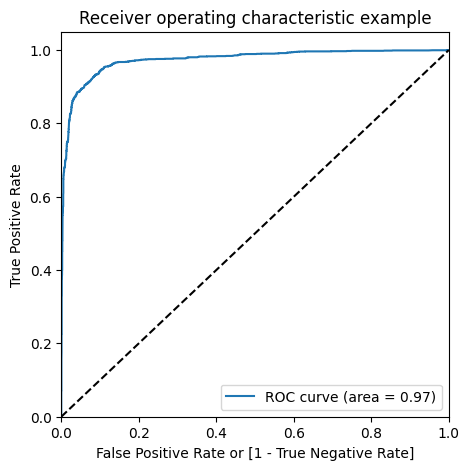

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Insights:

The ROC curve area is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Finding Optimal Cutoff Point

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006740,7551,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004813,6459,0,1,0,0,0,0,0,0,0,0,0
2,1,0.893075,1045,1,1,1,1,1,1,1,1,1,1,0
3,1,0.999519,5019,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006033,8259,0,1,0,0,0,0,0,0,0,0,0


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.391692  1.000000  0.000000
0.1   0.1  0.878419  0.969995  0.819454
0.2   0.2  0.913880  0.953440  0.888408
0.3   0.3  0.918541  0.933782  0.908728
0.4   0.4  0.924823  0.907915  0.935710
0.5   0.5  0.928673  0.885153  0.956696
0.6   0.6  0.927862  0.861873  0.970353
0.7   0.7  0.919959  0.835489  0.974350
0.8   0.8  0.911854  0.806518  0.979680
0.9   0.9  0.877001  0.705639  0.987342


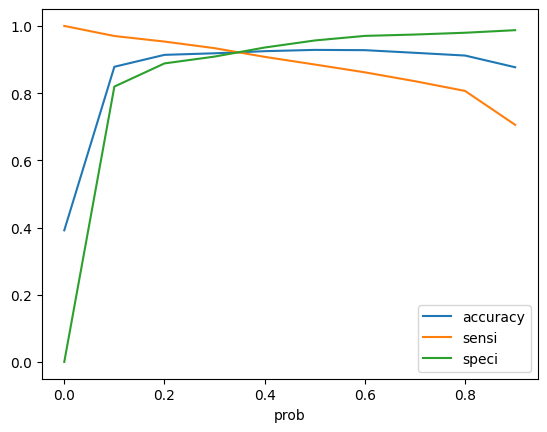

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, ~ 0.36 is the optimum point to take it as a cutoff probability.

In [155]:
#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.006740,7551,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004813,6459,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.893075,1045,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.999519,5019,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006033,8259,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
# y_train_pred after change in probability to 0.36
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.006740,7551,0,1
1,0,0.004813,6459,0,0
2,1,0.893075,1045,1,89
3,1,0.999519,5019,1,100
4,0,0.006033,8259,0,1


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9217831813576495

In [158]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2778,  224],
       [ 162, 1771]], dtype=int64)

In [159]:
# Confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9161924469736161

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.9253830779480346

## Making Predictions on the Test Set

In [162]:
#scaling test dataset
#num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1611,0.352434,-0.559910,1.275174,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6640,-0.017674,-1.046680,0.667583,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,-0.017674,1.396252,-0.547599,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6505,-1.128000,-0.084038,-1.155190,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8720,3.313302,-0.728827,0.211890,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
#X_test dataframe with resultant cols which are obtained from model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Response,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
1611,-0.559910,0,0,1,0,0,0,0,0
6640,-1.046680,0,0,0,0,0,0,0,0
7918,1.396252,0,0,0,0,0,1,0,0
6505,-0.084038,0,1,0,0,0,1,0,0
8720,-0.728827,0,0,0,0,0,0,0,0


In [164]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [165]:
# Check X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Response,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
1611,1.0,-0.559910,0,0,1,0,0,0,0,0
6640,1.0,-1.046680,0,0,0,0,0,0,0,0
7918,1.0,1.396252,0,0,0,0,0,1,0,0
6505,1.0,-0.084038,0,1,0,0,0,1,0,0
8720,1.0,-0.728827,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5710,1.0,-0.846887,0,1,0,0,0,0,0,0
7079,1.0,-0.572624,0,0,0,0,0,0,0,0
4584,1.0,0.627954,0,0,0,1,0,0,0,0
8593,1.0,-0.430952,0,0,0,0,0,1,0,0


In [166]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [167]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Let's see the head
y_pred_1.head()

,0
1611,0.154592
6640,0.003131
7918,0.462054
6505,0.047459
8720,0.004499


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.154592
1,0,0.003131
2,0,0.462054
3,0,0.047459
4,0,0.004499


In [173]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [174]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.154592
1,0,0.003131
2,0,0.462054
3,0,0.047459
4,0,0.004499


In [175]:
# Make predictions on the test set using 0.35 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [176]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.154592,0
1,0,0.003131,0
2,0,0.462054,1
3,0,0.047459,0
4,0,0.004499,0


In [177]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9111111111111111

In [178]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1215,   96],
       [  92,  712]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Calculate sensitivity
TP / float(TP+FN)

0.8855721393034826

In [181]:
# Calculate specificity
TN / float(TN+FP)

0.9267734553775744

This cutoff point seems good to go!

## Precision and Recall View

In [182]:
#Confusion matrix on train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2778,  224],
       [ 162, 1771]], dtype=int64)

In [183]:
##### Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.887719298245614

In [184]:
##### Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9161924469736161

In [185]:
# Importing libraries
from sklearn.metrics import precision_score, recall_score

In [186]:
# Precision using library method
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.887719298245614

In [187]:
# Recall using library method
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9161924469736161

## Precision and recall tradeoff

In [188]:
# importing libraries
from sklearn.metrics import precision_recall_curve

In [189]:
# Precision Recall curve on train dataset
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

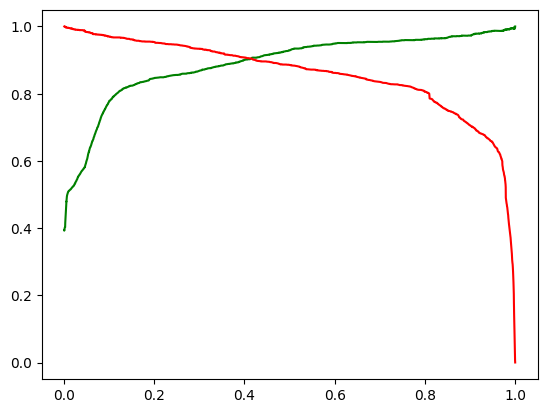

In [190]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The optimal value is ~0.42 from the Precision Recall curve

In [191]:
# Final prediction using the latest value from curve
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,0,0.006740,7551,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.004813,6459,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.893075,1045,1,1,1,1,1,1,1,1,1,1,0,1,89,1
3,1,0.999519,5019,1,1,1,1,1,1,1,1,1,1,1,1,100,1
4,0,0.006033,8259,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [192]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9252279635258359

In [193]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2824,  178],
       [ 191, 1742]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Calculate Precision

TP/(TP+FP)

0.9072916666666667

In [196]:
# Calculate Recall

TP/(TP+FN)

0.901189860320745

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.901189860320745

In [198]:
# Let us calculate specificity
TN / float(TN+FP)

0.9407061958694204

Insights:

Cutoff point looks good

## PREDICTIONS ON TEST SET

In [199]:
# Checking X_test and X_test_sm
X_test.head(5)


,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Response,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
1611,-0.559910,0,0,1,0,0,0,0,0
6640,-1.046680,0,0,0,0,0,0,0,0
7918,1.396252,0,0,0,0,0,1,0,0
6505,-0.084038,0,1,0,0,0,1,0,0
8720,-0.728827,0,0,0,0,0,0,0,0


In [200]:
X_test_sm.head(5)

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Response,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
1611,1.0,-0.559910,0,0,1,0,0,0,0,0
6640,1.0,-1.046680,0,0,0,0,0,0,0,0
7918,1.0,1.396252,0,0,0,0,0,1,0,0
6505,1.0,-0.084038,0,1,0,0,0,1,0,0
8720,1.0,-0.728827,0,0,0,0,0,0,0,0


In [201]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [202]:
y_test_pred[:10]

1611    0.154592
6640    0.003131
7918    0.462054
6505    0.047459
8720    0.004499
5270    0.887541
4820    0.993159
57      0.965695
5962    0.720604
650     0.996942
dtype: float64

In [203]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [204]:
# Let's see the head
y_pred_1.head()

,0
1611,0.154592
6640,0.003131
7918,0.462054
6505,0.047459
8720,0.004499


In [205]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [206]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [207]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [208]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [209]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1611,0.154592
1,0,6640,0.003131
2,0,7918,0.462054
3,0,6505,0.047459
4,0,8720,0.004499


In [210]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [211]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,1611,0.154592
1,0,6640,0.003131
2,0,7918,0.462054
3,0,6505,0.047459
4,0,8720,0.004499


In [212]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [213]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,1611,1,0.154592,15
1,6640,0,0.003131,0
2,7918,0,0.462054,46
3,6505,0,0.047459,5
4,8720,0,0.004499,0


In [214]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)


In [215]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,1611,1,0.154592,15,0
1,6640,0,0.003131,0,0
2,7918,0,0.462054,46,1
3,6505,0,0.047459,5,0
4,8720,0,0.004499,0,0


In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9153664302600473

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1235,   76],
       [ 103,  701]], dtype=int64)

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8718905472636815

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.9420289855072463

In [221]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9021879021879022

In [222]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8718905472636815

## Observations

#### Evaluation Metrics for the train Dataset:-
   - Accuracy:  92.41%
   - Sensitivity: 91.61%
   - Specificity: 92.53%
   - Precision and Recall(After tradeoff)
   - Precision: 90.72%
   - Recall:    90.11%

#### Evaluation Metrics for the test Dataset:-

   - Accuracy: 91.11%
   - Sensitivity: 88.55%
   - Specificity: 92.67%
   - Precision and Recall(After tradeoff)
   - Precision: 90.21%
   - Recall: 87.18%

## Recommendations
To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-

- Total Time Spent on Website: The customers spending more time on website can turn to be potential leads.

- Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it.

- Last Activity_Converted to Lead: The last activity by the customer who successfully converted to lead.

- Tags_Closed by Horizzon: The converted leads that are closed by Horizzon as they play major role in convertion.